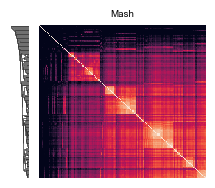

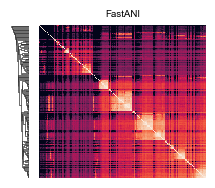

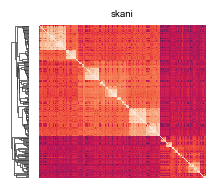

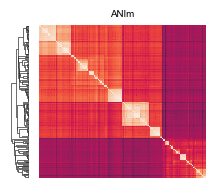

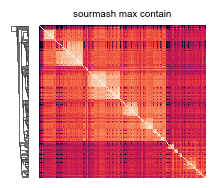

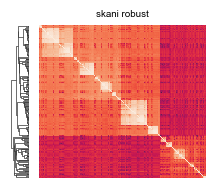

In [6]:
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(100000)
from scipy.cluster import hierarchy
import scipy
import sys

mat_skani_robust = "../results/skani_2328_robust"
mat_skani = "../results/skani_2328"
mat_mash = "../results/mash_2328"
mat_fastani = "../results/fastani_2328.matrix"
mat_anim = "../results/2328-anim/ANIm_percentage_identity.tab"
mat_sour = "../results/sour_2328"
mats = [mat_mash, mat_fastani, mat_skani, mat_anim, mat_sour, mat_skani_robust]

cm = 1/2.54
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'font.family':'arial'})

for (ell,file) in enumerate(mats):
    if 'aniu' in file:
        for line in open(file,'r'):
            spl = line.split();
            ref1 = spl[0]
            ref2 = spl[1]
            labels.append(ref1)
            if ref1 not in all_labels:
                all_labels.add(ref1)
            condensed.append(1 - float(spl[3])/100)

    else:
        counter = 0
        items = 0
        labels = []
        condensed = []
        matrix = []
        all_labels = set()
        max_c = 10000
        delim = '\t'
        counter = 0
        for line in open(file, 'r'):
            if counter == 0:
                #print(line)
                spl = line.split(delim)
                if len(spl) > 2:
                    items = len(spl)
                else:
                    items = int(line.split(delim)[-1])
                matrix = [[] for x in range(items)]
                counter += 1
                continue
            if delim in line:
                spl = line.split(delim);
            else:
                spl = line.split();
            labels.append(spl[0].split('/')[-1])
            endpoints = range(1,counter)
            if 'sour' in file:
                endpoints = range(0,counter-1)
            for i in endpoints:
                if 'mash' in file:
                    matrix[i-1].append(1 - float(spl[i]))
                elif 'fastani' in file:
                    matrix[i-1].append(float(spl[i])/100)
                else:
                    if 'sour' in file:
                        matrix[i].append(float(spl[i]))
                    else:
                        matrix[i-1].append(float(spl[i]))
            counter += 1
            #print(counter)
            if counter == max_c:
                break

        for vec in matrix:
            for score in vec:
                condensed.append(1 - score)

    mat = scipy.spatial.distance.squareform(condensed)
    cmap = sns.cm.rocket_r
    Z = hierarchy.linkage(condensed, 'average')
    labels = hierarchy.fcluster(Z, t=0.02, criterion='distance')
    cl = [(i,x) for (i,x) in enumerate(labels)]
    c_dict = defaultdict(list);

    cg = sns.clustermap(mat, row_linkage = Z, col_linkage = Z, figsize=(5.5*cm, 5.5*cm), vmax = 0.025, vmin = 0.00, cbar_pos=None, dendrogram_ratio = 0.1, cmap = cmap)
    cg.tick_params(bottom=False, right=False)
    ax = cg.ax_heatmap
    cg.ax_col_dendrogram.set_visible(False)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    if ell == 0:
        ax.set_title("Mash", fontsize = 7)
        plt.savefig("figures/2328_mash.png", transparent=True, dpi = 600,bbox_inches='tight',pad_inches=0)
    elif ell == 1:
        ax.set_title("FastANI", fontsize = 7)
        plt.savefig("figures/2328_fastani.png", transparent=True, dpi = 600,bbox_inches='tight',pad_inches=0)
    elif ell == 2:
        ax.set_title("skani", fontsize = 7)
        plt.savefig("figures/2328_skani.png", transparent=True, dpi = 600,bbox_inches='tight',pad_inches=0)
    elif ell == 3:
        ax.set_title("ANIm", fontsize = 7)
        plt.savefig("figures/2328_ANIm.pdf")
    elif ell == 4:
        ax.set_title("sourmash max contain", fontsize = 7)
        plt.savefig("figures/2328_sour.pdf")
    elif ell == 5:
        ax.set_title("skani robust", fontsize = 7)
        plt.savefig("figures/2328_skani_robust.pdf")
    plt.show()
#

